# Data Analysis Projects: Bike-sharing-dataset
- **Name:** Hamza Pratama
- **Email:** hamzapratama000@gmai.com
- **ID Dicoding:** hamzaapratama

## Define Business Questions

- Question 1: How do different weather conditions impact bike rentals across different seasons?
- Question 2: What is the effect of weekdays and holidays on bike rental usage throughout the day?

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Load the dataset

In [2]:
day_df = pd.read_csv('./dashboard/data/day.csv')
hour_df = pd.read_csv('./dashboard/data/hour.csv')

### Cleaning Data

In [3]:
# Inspect for null values or duplicate data and clean accordingly
print("Day dataset columns:", day_df.columns)
print("Hour dataset columns:", hour_df.columns)

Day dataset columns: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Hour dataset columns: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [4]:
# Drop 'instant' column only if it exists in the DataFrame
if 'instant' in day_df.columns:
    day_df.drop(columns=['instant'], inplace=True)

if 'instant' in hour_df.columns:
    hour_df.drop(columns=['instant'], inplace=True)

In [5]:
# Additional inspection
print("Updated Day dataset columns:", day_df.columns)
print("Updated Hour dataset columns:", hour_df.columns)

Updated Day dataset columns: Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')
Updated Hour dataset columns: Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


## Exploratory Data Analysis (EDA)

### Explore ...

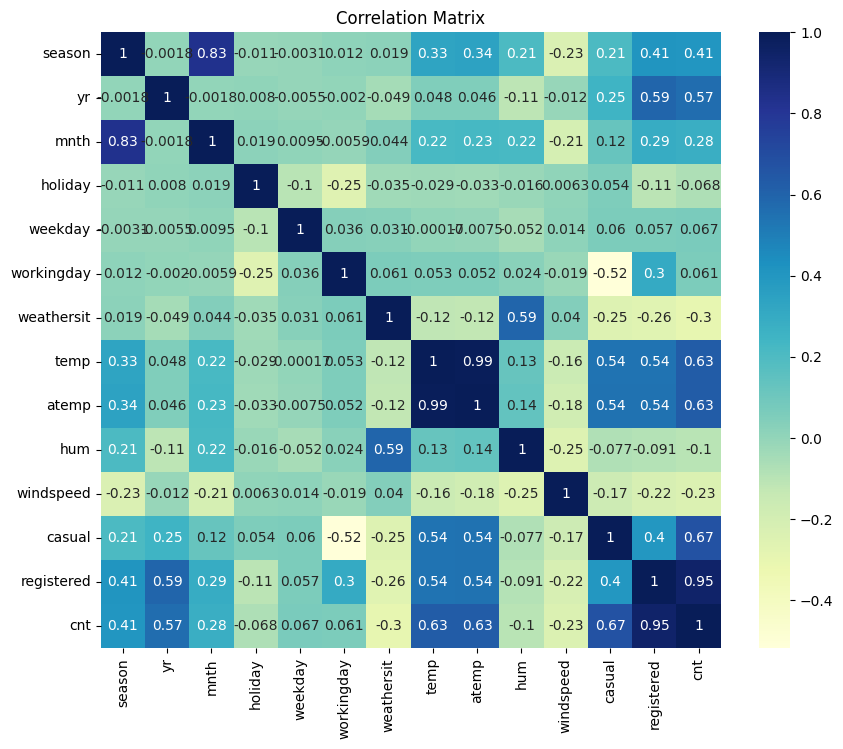

In [6]:
# Analyze data for correlations by selecting only numeric columns
numeric_day_df = day_df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
corr_matrix = numeric_day_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

## Visualization & Explanatory Analysis

### Question 1 Visualization: Impact of Weather on Bike Rentals across Seasons

C:\Users\Pratama\AppData\Local\Temp\ipykernel_24144\1488833875.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', hue='season', data=day_df, ci=None)


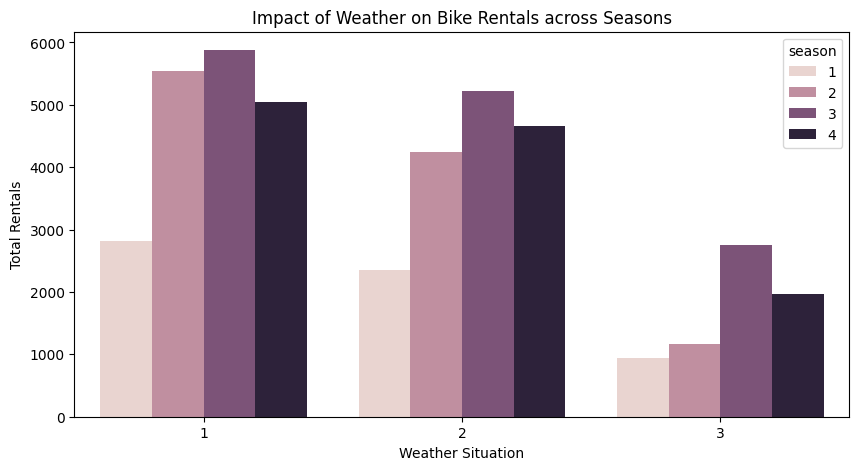

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(x='weathersit', y='cnt', hue='season', data=day_df, ci=None)
plt.title('Impact of Weather on Bike Rentals across Seasons')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')
plt.show()

### Question 2 Visualization: Bike Rentals Trend by Hour for Weekdays and Holidays

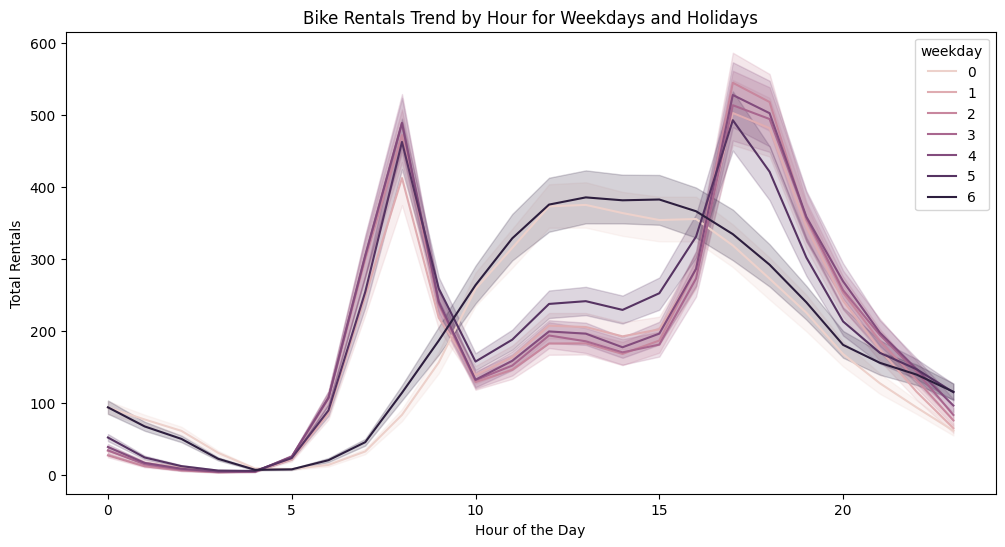

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='weekday', data=hour_df)
plt.title('Bike Rentals Trend by Hour for Weekdays and Holidays')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.show()

## Conclusion

In [9]:
print("Insights:")
print("- Different weather situations have varying impacts on the number of bike rentals, especially across different seasons.")
print("- Weekdays and weekends show different trends in rental usage, highlighting specific hours with higher activity.")

Insights:
- Different weather situations have varying impacts on the number of bike rentals, especially across different seasons.
- Weekdays and weekends show different trends in rental usage, highlighting specific hours with higher activity.
